In [15]:
from keras.datasets import imdb

## 피클을 처리하려면 예외가 발생하므로

 -  넘파이 load 모듈을 변경해서 처리

In [16]:
import numpy as np

In [17]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [18]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [19]:
# restore np.load for future normal usage
np.load = np_load_old

## 부정은 0 긍정은 1

###  긍정과 부정을 50% 씩 데이터화

In [21]:
train_labels.sum()

12500

In [24]:
(train_labels < 1).sum()

12500

In [23]:
train_labels.shape

(25000,)

In [25]:
train_data.shape

(25000,)

In [28]:
max(train_data.max())

9995

## 단어별로 변환하기

In [29]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 8s 5us/step


### 학습 데이터 내부의 원소가 전부 리스트로 되어 있음

In [38]:
train_data.shape

(25000,)

In [40]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [39]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [30]:
type(word_index)

dict

In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [35]:
reverse_word_index[9995]

'retrospect'

In [36]:
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [37]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 학습 및 데스트 데이터에 대한 다차원 배열로 변형

In [47]:
def vectorize_sequence(sequences, dimension= 10000) :
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences) :
        results[i,sequence] = 1
    return results

In [48]:
x_train = vectorize_sequence(train_data)

In [49]:
x_test = vectorize_sequence(test_data)

In [50]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [51]:
x_train.shape

(25000, 10000)

In [52]:
x_test.shape

(25000, 10000)

In [68]:
y_train = np.asarray(train_labels).astype('float32')

In [69]:
y_test = np.asarray(test_labels).astype('float32')

## 모델 정의하기

In [53]:
from keras import models

In [56]:
from keras import layers

### 모델 객체 만들기

In [58]:
type(models.Sequential)

type

In [57]:
model = models.Sequential()

### 모델에 계층 추가하기

In [60]:
type(layers.Dense)

type

In [62]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

Instructions for updating:
Colocations handled automatically by placer.


In [63]:
model.add(layers.Dense(16, activation='relu'))

In [64]:
model.add(layers.Dense(1, activation='sigmoid'))

## 모델  컴파일 하기

In [65]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## 검증 데이터 만들기

In [66]:
x_val = x_train[ : 10000]

In [67]:
partial_x_train = x_train[10000:]

In [70]:
y_val = y_train[:10000]

In [71]:
partial_y_train = y_train[10000:]

## 모델 훈련하기

In [72]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 

In [75]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 훈련과 검증 손실 그래프 그리기

In [76]:
%matplotlib inline

In [77]:
import matplotlib.pyplot as plt

In [78]:
history_dict = history.history

In [79]:
loss = history_dict['loss']

In [80]:
val_loss = history_dict['val_loss']

In [81]:
epochs = range(1, len(loss)+1)

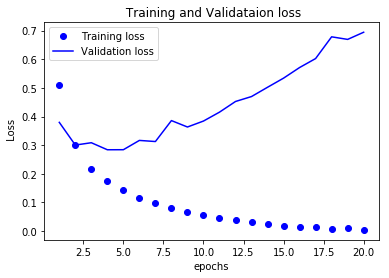

In [83]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")

plt.title(' Training and Validataion loss')
plt.xlabel('epochs')
plt.ylabel(' Loss')
plt.legend()

In [84]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

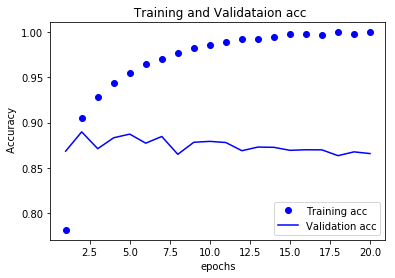

In [86]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation acc")

plt.title(' Training and Validataion acc')
plt.xlabel('epochs')
plt.ylabel(' Accuracy')
plt.legend()

## 다시 훈련하기

In [87]:
 model.fit(x_train,y_train,   epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2180 - acc: 0.9461
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1403 - acc: 0.9581
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.1100 - acc: 0.9674
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.0874 - acc: 0.9725


In [88]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 80us/step


In [89]:
results

[0.5017649423885345, 0.85828]

## 예측하기

In [90]:
model.predict(x_test)

array([[0.01344749],
       [0.99999917],
       [0.99621356],
       ...,
       [0.20714003],
       [0.09810081],
       [0.75915223]], dtype=float32)